In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
table_names = list(Base.classes.keys())
print(table_names)

['measurement', 'station']


In [17]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()
print(recent_date)

2017-08-23


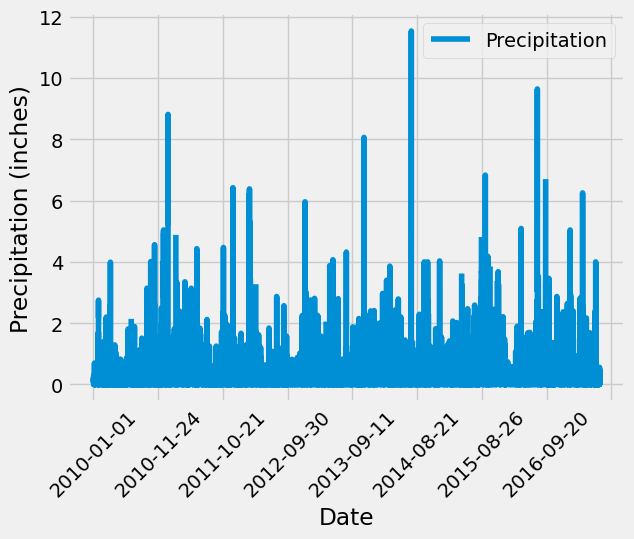

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Last = "2017-08-23"
# Calculate the date one year from the last date in data set.
year = (pd.to_datetime(Last) - pd.DateOffset(days=365)).strftime("%y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
results = session.query(Base.classes.measurement.date, Base.classes.measurement.prcp).filter(Base.classes.measurement.date >= year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number of stations in the dataset
total=session.query(func.count(Station.id)).all()
total

[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Base.classes.measurement.station, func.count(Base.classes.measurement.station)).\
    group_by(Base.classes.measurement.station).\
    order_by(func.count(Base.classes.measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==active_station[0][0]).all()
temperature

[(54.0, 85.0, 71.66378066378067)]

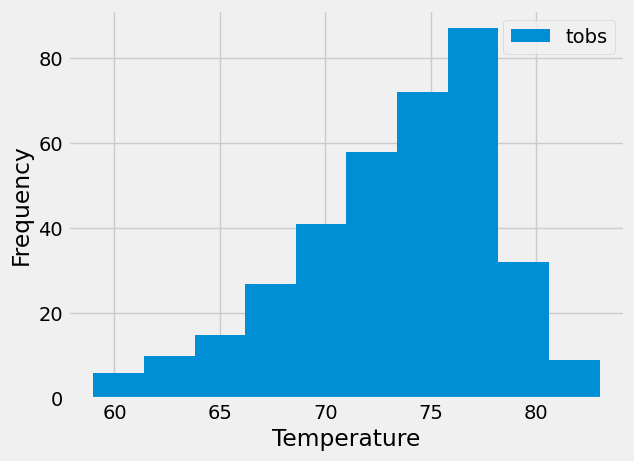

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active = 'USC00519281'
last_date = session.query(func.max(Base.classes.measurement.date)).filter(Base.classes.measurement.station == active).scalar()
one_year = (pd.to_datetime(last_date) - pd.DateOffset(days=365)).date()
result = session.query(Base.classes.measurement.tobs).\
    filter((Base.classes.measurement.station == active)&(Base.classes.measurement.date >= one_year)).all()
df = pd.DataFrame(result, columns=['Temperature(°F)'])
plt.hist(df['Temperature(°F)'])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()
           


# Close Session

In [45]:
# Close Session
session.close()